In [1]:
#Import all needed modules
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import cv2
import keras
from numpy import random
from matplotlib.image import imread
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D
from keras.layers import MaxPooling2D, BatchNormalization
from keras.applications import MobileNet, VGG16, ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report ,confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import os

Load train, test, and validation folders

In [2]:
train_folder = "/content/drive/MyDrive/Data/train"
valid_folder = "/content/drive/MyDrive/Data/valid"
test_folder = "/content/drive/MyDrive/Data/test"

In [3]:
def visualize_images(folder_path):
    '''
    - Input : folder path for images visualization

    * Load images files and choose images randomly from folder

    - Output: 10 images from folder (2*5)

    '''


    image_files = os.listdir(folder_path)
    fig, ax = plt.subplots(2, 5, figsize=(12, 4))
    for i in range(2):
        for j in range(5):
            image_path = os.path.join(folder_path, random.choice(image_files))
            image = imread(image_path)
            ax[i, j].imshow(image, cmap='gray')
            ax[i, j].axis('off')
    plt.show()


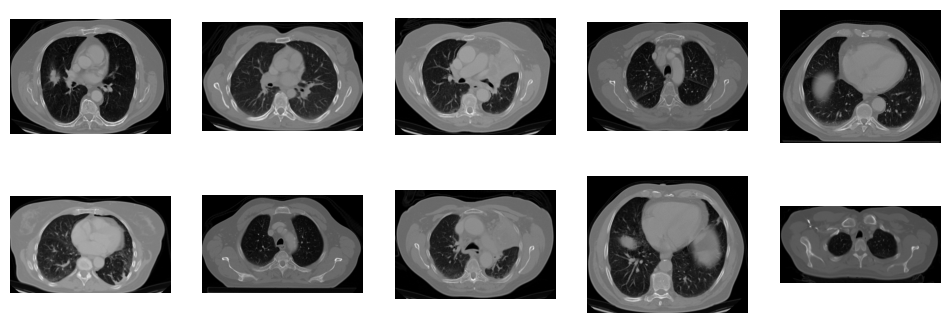

In [4]:
folder_path = '/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
visualize_images(folder_path)

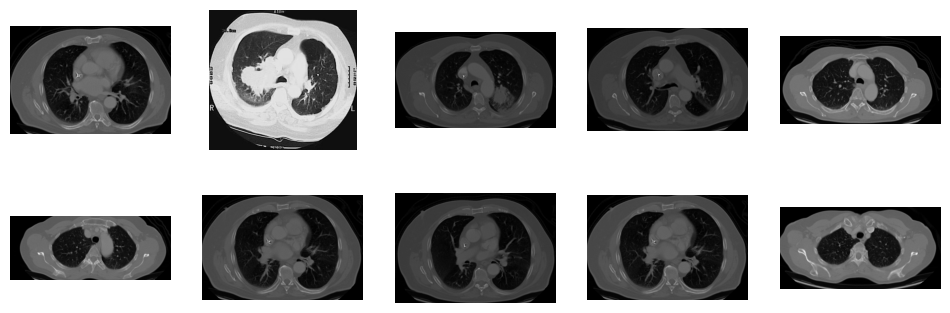

In [5]:
folder_path = '/content/drive/MyDrive/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
visualize_images(folder_path)

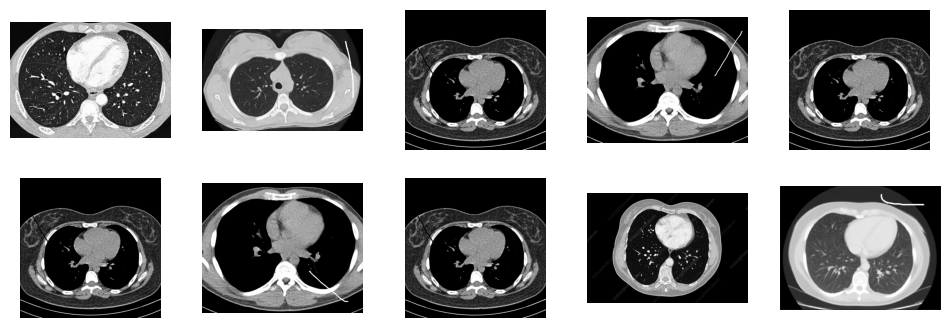

In [6]:
folder_path = '/content/drive/MyDrive/Data/train/normal'
visualize_images(folder_path)

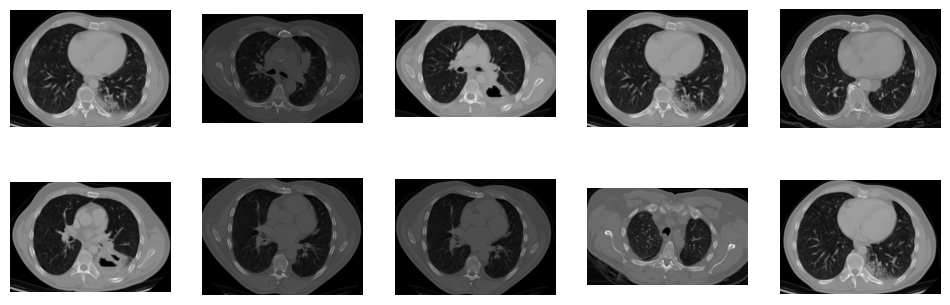

In [7]:
folder_path = '/content/drive/MyDrive/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
visualize_images(folder_path)

In [8]:
def visualize_images_RGB(folder_path):
    image_files = os.listdir(folder_path)
    fig, ax = plt.subplots(2, 5, figsize=(12, 4))
    for i in range(2):
        for j in range(5):
            image_path = os.path.join(folder_path, random.choice(image_files))
            image = imread(image_path)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            ax[i, j].imshow(image, cmap='jet')
            ax[i, j].axis('off')
    plt.show()

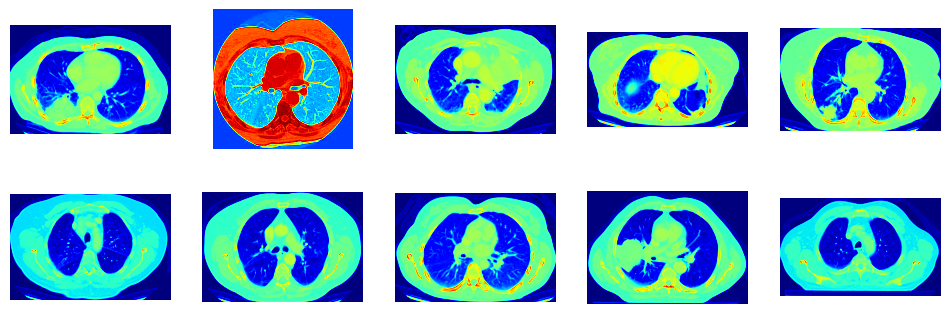

In [9]:
folder_path = '/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
visualize_images_RGB(folder_path)

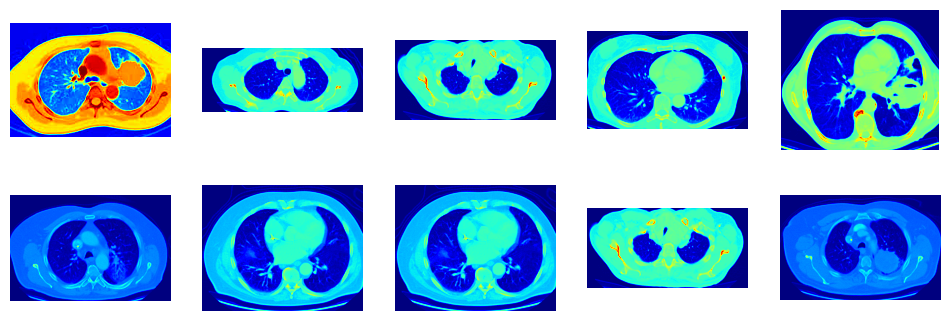

In [10]:
folder_path = '/content/drive/MyDrive/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
visualize_images_RGB(folder_path)

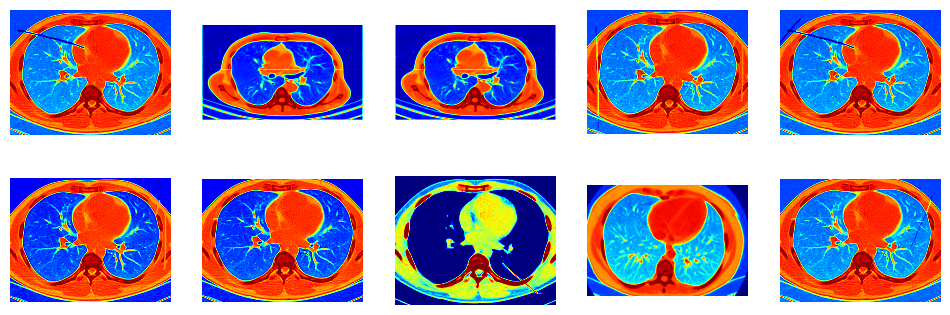

In [14]:
folder_path = '/content/drive/MyDrive/Data/train/normal'
visualize_images_RGB(folder_path)

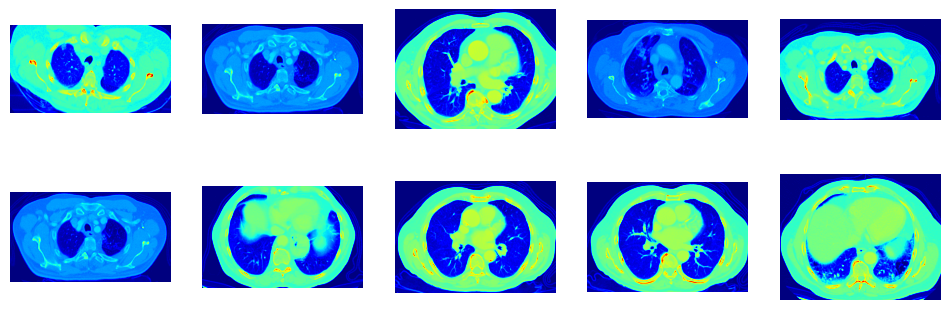

In [15]:
folder_path = '/content/drive/MyDrive/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
visualize_images_RGB(folder_path)

In [16]:
def Visualize_images_Hot(folder_path):
    image_files = os.listdir(folder_path)
    fig, ax = plt.subplots(2, 5, figsize=(12, 4))
    for i in range(2):
        for j in range(5):
            image_path = os.path.join(folder_path, random.choice(image_files))
            image = imread(image_path)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            ax[i, j].imshow(image, cmap='hot')
            ax[i, j].axis('off')
    plt.show()

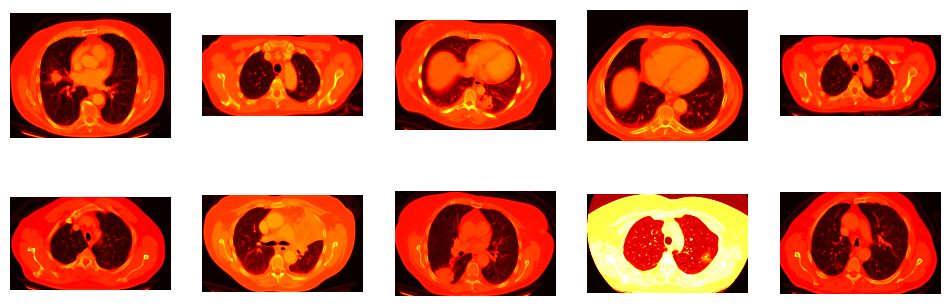

In [17]:
folder_path = '/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
Visualize_images_Hot(folder_path)

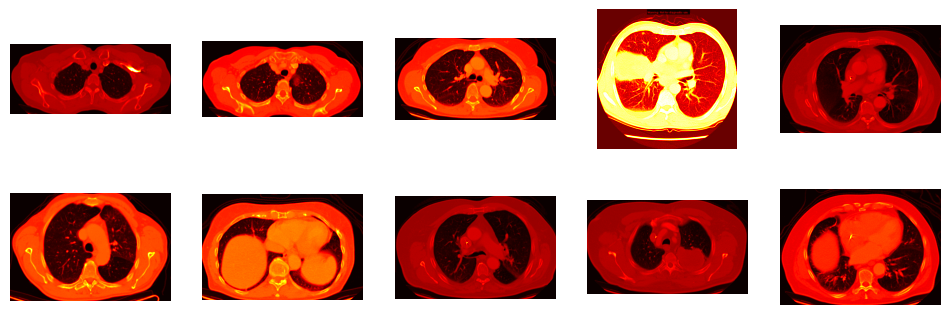

In [18]:
folder_path = '/content/drive/MyDrive/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
Visualize_images_Hot(folder_path)

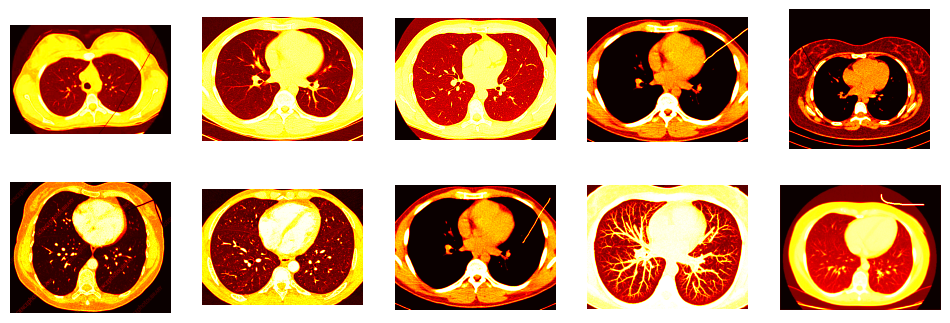

In [22]:
folder_path = '/content/drive/MyDrive/Data/train/normal'
Visualize_images_Hot(folder_path)

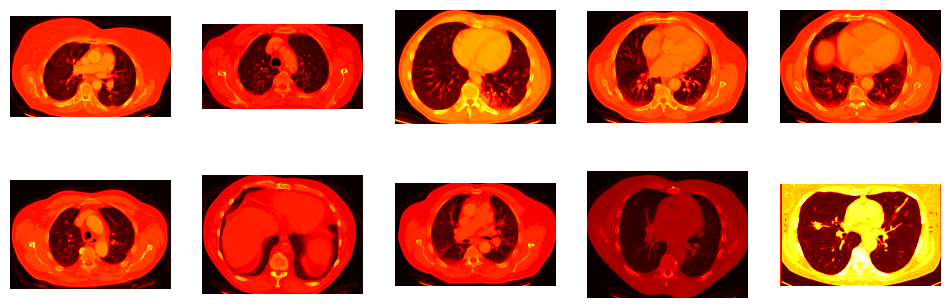

In [23]:
folder_path = '/content/drive/MyDrive/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
Visualize_images_Hot(folder_path)

**How many images for each class in a train, test, and validation folders**

In [24]:
def Show_samples_num(train_folder,test_folder,valid_folder):
  print("\n\n\t\tTraining Set")
  print("\t  ========================\n")
  train_c = []
  for folder in os.listdir(train_folder):
    train_c.append(folder)
    print("\nTrain "+ folder + " Class: ", len(os.listdir(train_folder + '/' + folder)))

  print("\n\n", train_c)


  print("\n\n\t\tTesting Set")
  print("\t  ========================\n")
  test_c = []
  for folder in os.listdir(test_folder):
    test_c.append(folder)
    print("\nTest "+ folder + " Class: ", len(os.listdir(test_folder + '/' + folder)))

  print("\n\n", test_c)


  print("\n\n\t\tValidation Set")
  print("\t  ========================\n")
  val_c = []
  for folder in os.listdir(valid_folder):
    val_c.append(folder)
    print("\nValidation "+ folder + " Class: ", len(os.listdir(valid_folder + '/' + folder)))

  print("\n\n", val_c, "\n")




In [25]:
Show_samples_num(train_folder,test_folder,valid_folder)



		Training Set


Train adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib Class:  195

Train large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa Class:  121

Train normal Class:  148

Train squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa Class:  155


 ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']


		Testing Set


Test squamous.cell.carcinoma Class:  90

Test normal Class:  54

Test adenocarcinoma Class:  120

Test large.cell.carcinoma Class:  51


 ['squamous.cell.carcinoma', 'normal', 'adenocarcinoma', 'large.cell.carcinoma']


		Validation Set


Validation normal Class:  13

Validation large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa Class:  21

Validation squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa Class:  15

Validation adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib Class:  23


 ['normal', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0

**Using data augmentation to avoid overfitting**

In [26]:
input_shape = (224,224,3)
num_class = 4
def Data_augmentation(train,valid,test):

  train_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function=preprocess_input,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
  )

  val_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function=preprocess_input,
  )

  test_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function=preprocess_input,
  )

  train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
  )


  test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle = False,
  )
  validation_generator = val_datagen.flow_from_directory(
    valid,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
  )


  return(train_generator,validation_generator,test_generator)


In [27]:
train_images, valid_images, test_images =Data_augmentation(train_folder,valid_folder,test_folder)

Found 619 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


**Load VGG16 model **

In [33]:

modelVGG16 = VGG16(weights = 'imagenet',
                     include_top = False,
                     input_shape = input_shape)

for layer in modelVGG16.layers:
    layer.trainable = False


58889256/58889256 [==============================] - 0s 0us/step


**Build my model**

In [34]:

def CNN_Model(num_class,Model):

  model = Sequential([




    Model,
    BatchNormalization(),
    layers.MaxPooling2D(pool_size = (2,2)),


    layers.Flatten(),

    layers.Dense(1024, activation = 'relu'),
    layers.Dropout(0.3),

    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.3),

    layers.Dense(256, activation = 'relu'),

    layers.Dense(128, activation = 'relu'),








    layers.Dense(num_class, activation = 'softmax')




  ])

  return(model)

In [35]:
from tensorflow.keras.models import Sequential
Input_shape=(224,224,3)
Num_class=4

CNN_Model = CNN_Model(num_class,modelVGG16)


In [36]:
CNN_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization (Batch  (None, 7, 7, 512)         2048      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 512)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 1024)              4719616   
                                                                 
 dropout (Dropout)           (None, 1024)              0

In [37]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [38]:
CNN_Model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

In [39]:
history = CNN_Model.fit(
    train_images,
    validation_data=valid_images,
    epochs=100,
    verbose=1,

)


Epoch 1/100
20/20 [==============================] - 41s 1s/step - loss: 1.5827 - accuracy: 0.4475 - val_loss: 1.7560 - val_accuracy: 0.4028
Epoch 2/100
20/20 [==============================] - 12s 603ms/step - loss: 0.9533 - accuracy: 0.5800 - val_loss: 0.7328 - val_accuracy: 0.6250
Epoch 3/100
20/20 [==============================] - 12s 631ms/step - loss: 0.8769 - accuracy: 0.6252 - val_loss: 0.6972 - val_accuracy: 0.6528
Epoch 4/100
20/20 [==============================] - 12s 613ms/step - loss: 0.7750 - accuracy: 0.6753 - val_loss: 0.7481 - val_accuracy: 0.6528
Epoch 5/100
20/20 [==============================] - 14s 698ms/step - loss: 0.6625 - accuracy: 0.7173 - val_loss: 0.6312 - val_accuracy: 0.7222
Epoch 6/100
20/20 [==============================] - 12s 594ms/step - loss: 0.5362 - accuracy: 0.7884 - val_loss: 0.6840 - val_accuracy: 0.7222
Epoch 7/100
20/20 [==============================] - 12s 603ms/step - loss: 0.5708 - accuracy: 0.7771 - val_loss: 0.4108 - val_accuracy: 0.

In [40]:
loss, acc = CNN_Model.evaluate(test_images,verbose = 1)

10/10 [==============================] - 48s 5s/step - loss: 0.3757 - accuracy: 0.9270


In [41]:
tf.keras.models.save_model(CNN_Model, "/content/drive/MyDrive/Data/my_model.h5")


<ipython-input-41-b4665b6f1826>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(CNN_Model, "/content/drive/MyDrive/Data/my_model.h5")


In [42]:
CNN_Model.save_weights("/content/drive/MyDrive/Data/my_model_weights.h5")


In [43]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Data/my_model.h5')

Predict a sample from test images

In [44]:

test_image_path = '/content/drive/MyDrive/Data/test/normal/10 - Copy (3).png'
test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(224, 224))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)


In [45]:

test_image = test_image / 255.0

In [47]:
class_labels = ['Adenocarcinoma', 'Large cell carcinoma', 'Squamous cell carcinoma', 'Normal']
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)

# Print the classification label
print(f'Predicted Class: {class_labels[predicted_class]}')

1/1 [==============================] - 0s 46ms/step
Predicted Class: Normal


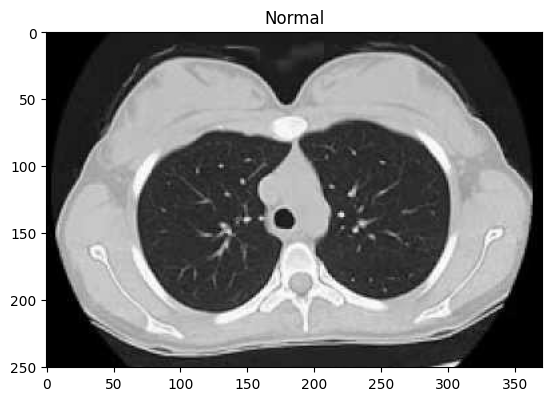

In [48]:

image = plt.imread('/content/drive/MyDrive/Data/test/normal/10 - Copy (3).png')
plt.imshow(image)


plt.title(class_labels[predicted_class])


plt.show()

**Classification Report**

In [49]:
predictions_prob = model.predict(test_images)
predictions = np.argmax(predictions_prob , axis = 1)
true_label = test_images.classes
report = classification_report(true_label,predictions)
print(report)

10/10 [==============================] - 3s 263ms/step
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       120
           1       0.83      0.98      0.90        51
           2       0.98      0.98      0.98        54
           3       0.92      0.94      0.93        90

    accuracy                           0.93       315
   macro avg       0.92      0.94      0.93       315
weighted avg       0.93      0.93      0.93       315



**Confusion Matrix**

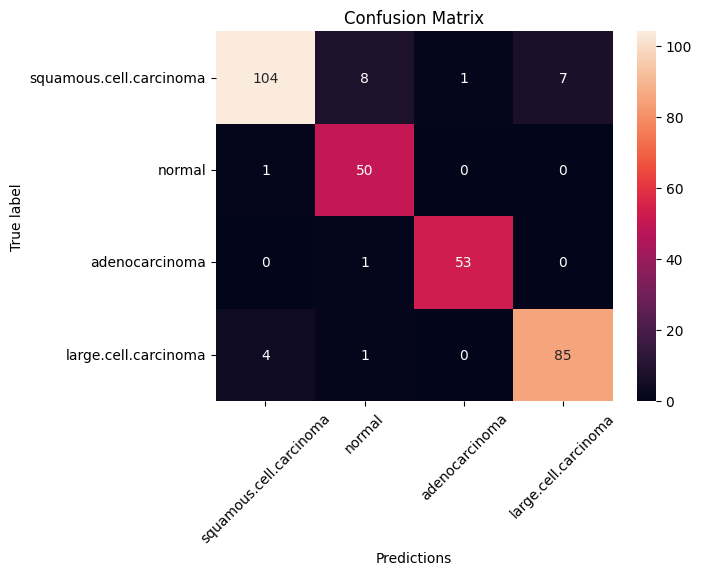

In [50]:
test_c=['squamous.cell.carcinoma', 'normal', 'adenocarcinoma', 'large.cell.carcinoma']
conf_mat = confusion_matrix(true_label,predictions)
sns.heatmap(conf_mat ,fmt='g',annot = True  , xticklabels=test_c , yticklabels = test_c,)
plt.xlabel('Predictions')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation = 45)
plt.show()

**Plot to show the change in the model accuracy in the training set and the validation set with an increasing number of epochs**

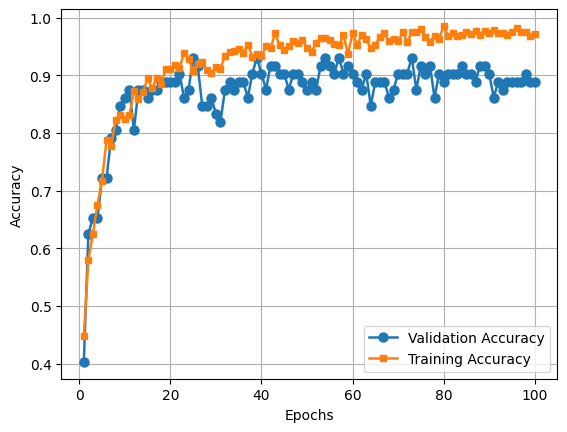

In [51]:

result = history.history
train_acc = result.get('accuracy')
val_accuracy = result.get('val_accuracy')

epochs = range(1, len(train_acc) + 1)

line1 = plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
line2 = plt.plot(epochs, train_acc, label = 'Training Accuracy')

plt.setp(line1, linewidth = 1.8, marker = 'o', markersize = 6.5)
plt.setp(line2, linewidth = 1.8, marker = 's', markersize = 5)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

**Plot to show the change in the model loss in the training set and the validation set with an increasing number of epochs**

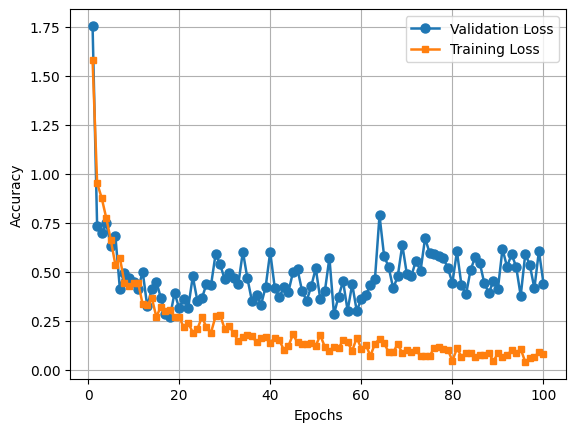

In [52]:

res = history.history
train_loss = res['loss']
val_loss = res['val_loss']
epochs = range(1, len(train_loss) + 1)

line1 = plt.plot(epochs, val_loss, label = 'Validation Loss')
line2 = plt.plot(epochs, train_loss, label = 'Training Loss')

plt.setp(line1, linewidth = 1.8, marker = 'o', markersize = 6.5)
plt.setp(line2, linewidth = 1.8, marker = 's', markersize = 5)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()